In [40]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [41]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape : {}, x_test.shape : {}'.format(x_train.shape, x_test.shape))
print('t_train.shape : {}, t_test.shape : {}'.format(t_train.shape, t_test.shape))

x_train.shape : (60000, 28, 28), x_test.shape : (10000, 28, 28)
t_train.shape : (60000,), t_test.shape : (10000,)


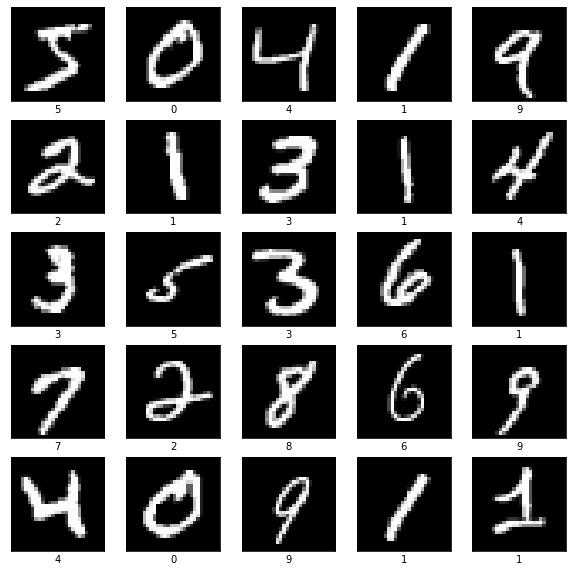

In [42]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [43]:
learning_rate = 0.001
epochs = 30
batch_size = 50

In [44]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1),
                 kernel_size=(3,3),
                 filters=32,
                 strides=(1,1),
                 activation='relu',
                 padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))
model.add(Dropout(0.25))

model.add(Conv2D(kernel_size=(3,3),
                 filters=64,
                 strides=(1,1),
                 activation='relu',
                 padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))
model.add(Dropout(0.25))

model.add(Conv2D(kernel_size=(3,3),
                 filters=128,
                 strides=(1,1),
                 activation='relu',
                 padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 64)         

In [45]:
model.compile(optimizer=Adam(learning_rate=learning_rate), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [65]:
for layer in model.layers:

    if 'conv' in layer.name:
        print(layer.name, layer.output.shape)

conv2d_3 (None, 28, 28, 32)
conv2d_4 (None, 14, 14, 64)
conv2d_5 (None, 7, 7, 128)


In [47]:
for idx in range(len(model.layers)):
    print('model.layers[%d] = %s, %s' %(idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layers[0] = conv2d_3, (None, 28, 28, 32)
model.layers[1] = max_pooling2d_3, (None, 14, 14, 32)
model.layers[2] = dropout_3, (None, 14, 14, 32)
model.layers[3] = conv2d_4, (None, 14, 14, 64)
model.layers[4] = max_pooling2d_4, (None, 7, 7, 64)
model.layers[5] = dropout_4, (None, 7, 7, 64)
model.layers[6] = conv2d_5, (None, 7, 7, 128)
model.layers[7] = max_pooling2d_5, (None, 4, 4, 128)
model.layers[8] = dropout_5, (None, 4, 4, 128)
model.layers[9] = flatten_1, (None, 2048)
model.layers[10] = dense_1, (None, 10)


In [48]:
partial_model = Model(inputs=model.inputs, outputs=model.layers[0].output)

partial_model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


6758


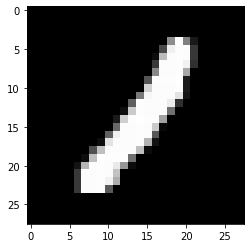

In [49]:
random_idx = np.random.randint(0, len(x_test))

print(random_idx)
plt.imshow(x_test[random_idx].reshape(28,28), cmap='gray')

In [50]:
feature_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1))

print(feature_map.shape)

fm = feature_map[0]

print(fm.shape)

(1, 28, 28, 32)
(28, 28, 32)


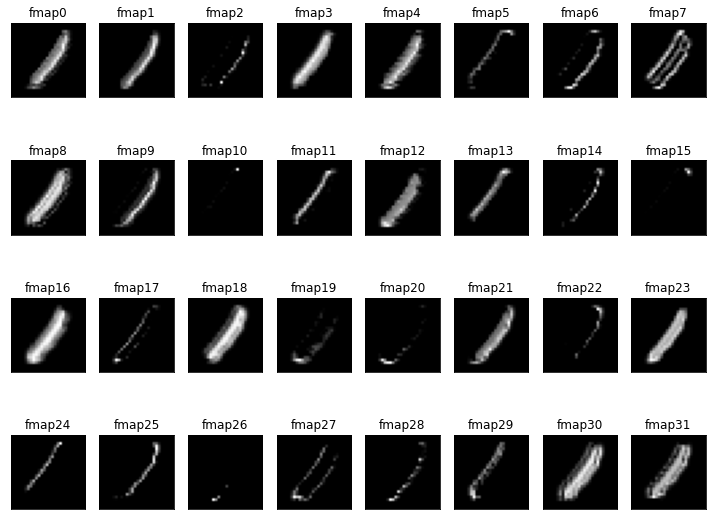

In [51]:
plt.figure(figsize=(10,8))

for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(fm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title('fmap'+str(i))
plt.tight_layout()
plt.show()

In [52]:
# model의 두 번째 층 즉, 1번째 층만 떼어냄
partial_model = Model(inputs=model.inputs, outputs=model.layers[1].output)

partial_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [53]:
pooling_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1))

print(pooling_map.shape)

pm = pooling_map[0]

print(pm.shape)

(1, 14, 14, 32)
(14, 14, 32)


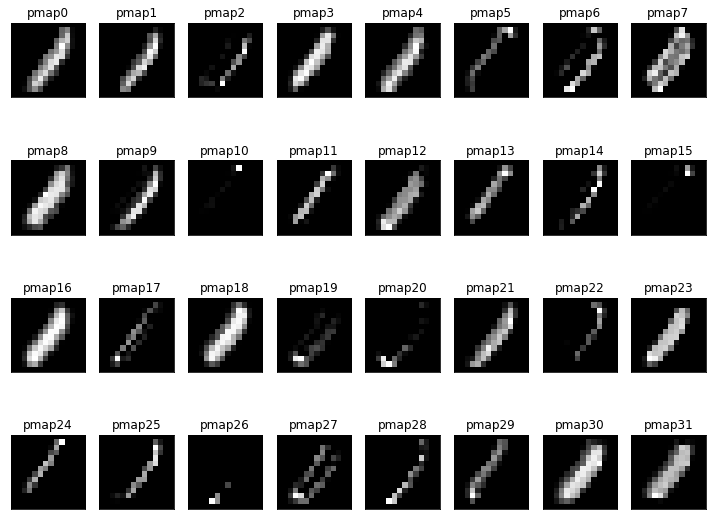

In [54]:
plt.figure(figsize=(10,8))

for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(pm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title('pmap'+str(i))
plt.tight_layout()
plt.show()

In [55]:
start_time = datetime.now()

hist = model.fit(x_train, t_train, epochs=epochs,batch_size=batch_size,validation_data=(x_test,t_test))

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time-start_time)

Epoch 1/30
1200/1200 [==============================] - 15s 12ms/step - loss: 0.2106 - accuracy: 0.9316 - val_loss: 0.0431 - val_accuracy: 0.9858
Epoch 2/30
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0669 - accuracy: 0.9789 - val_loss: 0.0305 - val_accuracy: 0.9904
Epoch 3/30
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0507 - accuracy: 0.9839 - val_loss: 0.0279 - val_accuracy: 0.9905
Epoch 4/30
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0440 - accuracy: 0.9858 - val_loss: 0.0284 - val_accuracy: 0.9906
Epoch 5/30
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0370 - accuracy: 0.9878 - val_loss: 0.0233 - val_accuracy: 0.9926
Epoch 6/30
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0223 - val_accuracy: 0.9927
Epoch 7/30
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.0278 -

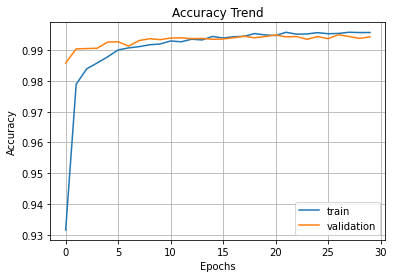

In [56]:
plt.title('Accuracy Trend')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend(loc='best')
plt.show()

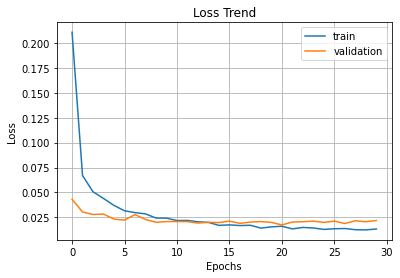

In [57]:
plt.title('Loss Trend')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend(loc='best')
plt.show()

CNN 특징맵 시각화

In [58]:
for idx in range(len(model.layers)):
    print('model.layers[%d] = %s, %s' %(idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layers[0] = conv2d_3, (None, 28, 28, 32)
model.layers[1] = max_pooling2d_3, (None, 14, 14, 32)
model.layers[2] = dropout_3, (None, 14, 14, 32)
model.layers[3] = conv2d_4, (None, 14, 14, 64)
model.layers[4] = max_pooling2d_4, (None, 7, 7, 64)
model.layers[5] = dropout_4, (None, 7, 7, 64)
model.layers[6] = conv2d_5, (None, 7, 7, 128)
model.layers[7] = max_pooling2d_5, (None, 4, 4, 128)
model.layers[8] = dropout_5, (None, 4, 4, 128)
model.layers[9] = flatten_1, (None, 2048)
model.layers[10] = dense_1, (None, 10)


In [59]:
# model의 첫 번째 층 즉, 0번째 층만 떼어냄
partial_model = Model(inputs=model.inputs, outputs=model.layers[0].output)

partial_model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [60]:
feature_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1))

print(feature_map.shape)

fm = feature_map[0]

print(fm.shape)

(1, 28, 28, 32)
(28, 28, 32)


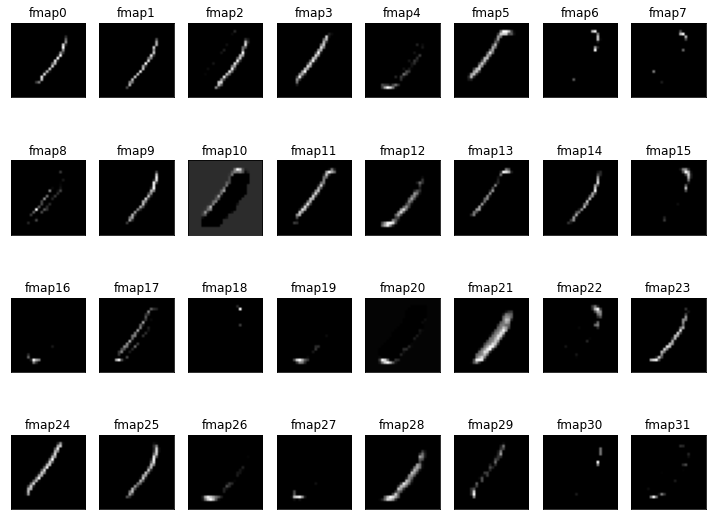

In [61]:
plt.figure(figsize=(10,8))

for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(fm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title('fmap'+str(i))
plt.tight_layout()
plt.show()

In [62]:
# model의 두 번째 층 즉, 1번째 층만 떼어냄
partial_model = Model(inputs=model.inputs, outputs=model.layers[1].output)

partial_model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [63]:
pooling_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1))

print(pooling_map.shape)

pm = pooling_map[0]

print(pm.shape)

(1, 14, 14, 32)
(14, 14, 32)


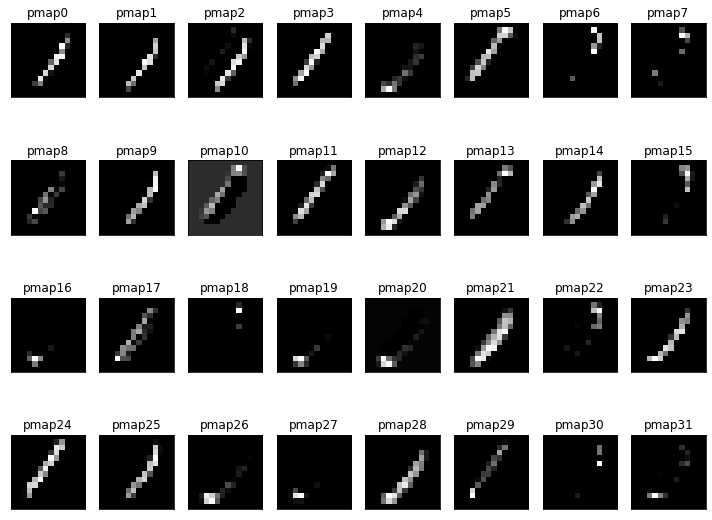

In [64]:
plt.figure(figsize=(10,8))

for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(pm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title('pmap'+str(i))
plt.tight_layout()
plt.show()